# Geographic Data Tools in Python


## Step 1: Getting Geographical Data

Here we will begin looking at Python's tools for visualizing geographic data by looking at several sources for obtaining geographical data.

* From Python's geodatasets package
* From Python's geopy package
* Directly from sensors

### Getting Example Geographical Data with `geodatasets` and Plotting with `geopandas` 

* **GitHub**: [https://github.com/geopandas/geodatasets/tree/main](https://github.com/geopandas/geodatasets/tree/main)
* **Website**: [https://geodatasets.readthedocs.io/en/latest/](https://geodatasets.readthedocs.io/en/latest/)

The `geodatasets` package is part of `geopandas`, but is installed separately. The `geodatasets` package provides an interface to obtain externally hosted datasets for educational purposes. We will look at `geopandas` in a moment, but let's begin by using `geodatasets` to get some data to use for our examples.

If you haven't already, install both `geopandas` and `geodatasets`.

```bash
pip install geopandas
pip install geodatasets
```

Once both are installed, import both packages.

In [1]:
import pandas as pd
import geopandas as gpd
import geodatasets

We can use `geodatasets` to get the borough boundaries of New York City. This will download a zip file with the path and save it in a temporary location on your local machine. You can then

Note that this will not work without internet access.

In [2]:
# Download and get bath to data on the boundaries of NYC's boroughs
nyc_borough_boundaries_path = geodatasets.get_path("nybb")
print("Extracted to path: {}".format(nyc_borough_boundaries_path))

# Read the the data into a geopandas.geodataframe
boroughs = gpd.read_file(nyc_borough_boundaries_path)

# Set the index to the borough code so we can color by borough
boroughs.set_index("BoroCode", inplace=True)
boroughs.sort_index(inplace=True)

# Boroughs is now a geodataframe containing shapes for each borough
print(boroughs)
boroughs

Extracted to path: C:\Users\sanch\AppData\Local\geodatasets\geodatasets\Cache\nybb_16a.zip.unzip\nybb_16a\nybb.shp
               BoroName     Shape_Leng    Shape_Area  \
BoroCode                                               
1             Manhattan  359299.096471  6.364715e+08   
2                 Bronx  464392.991824  1.186925e+09   
3              Brooklyn  741080.523166  1.937479e+09   
4                Queens  896344.047763  3.045213e+09   
5         Staten Island  330470.010332  1.623820e+09   

                                                   geometry  
BoroCode                                                     
1         MULTIPOLYGON (((981219.056 188655.316, 980940....  
2         MULTIPOLYGON (((1012821.806 229228.265, 101278...  
3         MULTIPOLYGON (((1021176.479 151374.797, 102100...  
4         MULTIPOLYGON (((1029606.077 156073.814, 102957...  
5         MULTIPOLYGON (((970217.022 145643.332, 970227....  


,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


We can see that each borough is a collection of multiple polygons, which is how geopandas can show them as a map. From here, plotting them is as easy as making a simple call to the `.plot()` interface for `geopandas`, which works exactly like the familiar `.plot()` interface for `pandas`. We use the `column=` argument to let `geopandas` know to color by borough. We will ignore the plot axes for now and come back to them later.

<Axes: >

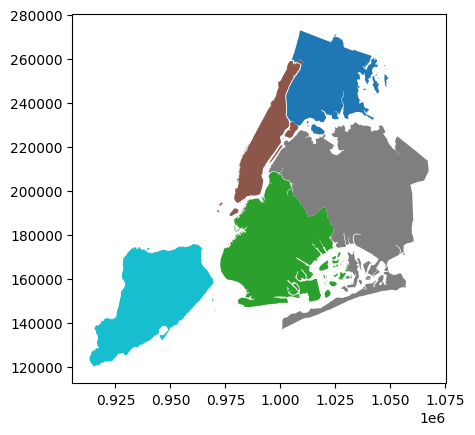

In [3]:
boroughs.plot(column="BoroName")

### Getting Geographical Data with `geopy`

* **GitHub**: [https://github.com/geopy/geopy](https://github.com/geopy/geopy)
* **Website**: [https://geopy.readthedocs.io/en/stable/](https://geopy.readthedocs.io/en/stable/)

The `geopy` package is provides a Python interface to third party geocoding services which makes it easy to locate the coordinates of addresses, cities, countries, and landmarks.

You can install `geopy` with pip.

```bash
pip install geopy
```

To access these services, we will also need to generate an SSL certificate. This will require installing the `certifi` and `ssl` packages. The `ssl` package should be available as part of Python but you may need to install `certifi`.

```bash
pip install certifi
```

The interface provides individual abstractions to services like Google Maps, Bing Maps, Nominatim, and others. Each interface to each of these services can be imported separately, and provides a `geocode` method to convert a string (e.g., an address) into a specific location on the globe. Here we will see how to access Nominatim.

In [4]:
import geopy.geocoders
from geopy.geocoders import Nominatim
import certifi
import ssl


# Generate a certificate
ctx = ssl.create_default_context(cafile=certifi.where())

# Tell geopy to use the certificate
geopy.geocoders.options.default_ssl_context = ctx

place_strings = [
    "Rutgers Camden",
    "Empire State Building",
    "Lincoln Financial Field",
]

geolocator = Nominatim(user_agent="ruc_data_viz_class")

for place_string in place_strings:
    location = geolocator.geocode(place_string)
    print(
        f"({location.latitude:.10f} deg lat, {location.longitude:.10f} deg lon): {location.address}"
    )

(39.9483612500 deg lat, -75.1226986301 deg lon): Rutgers University Camden, Pearl Street, Downtown, Camden, Camden County, New Jersey, 08102, United States
(40.7484420500 deg lat, -73.9856589016 deg lon): Empire State Building, 350, 5th Avenue, Manhattan Community Board 5, Manhattan, New York County, City of New York, New York, 10118, United States
(39.9009099000 deg lat, -75.1674891561 deg lon): Lincoln Financial Field, South Darien Street, South Philadelphia Sports Complex, South Philadelphia, Philadelphia, Philadelphia County, Pennsylvania, 19148, United States


This can be very useful for adding functionality to plot user defined landmarks in our visualizations! We can also do the reverse and find the address at a set of coordinates.

In [5]:
latitudes = [39.948361, 39.948361, 39.948361]
longitudes = [-75.122699, -73.985659, -75.167489]
coordinates_df = pd.DataFrame(
    {'latitude': latitudes, 'longitude': longitudes}
)

for _, coordinates in coordinates_df.iterrows():
    coordinates_str = f"{coordinates["latitude"]}, {coordinates["longitude"]}"
    location = geolocator.reverse(coordinates_str)
    print(location.address)

Rutgers University Camden, Pearl Street, Downtown, Camden, Camden County, New Jersey, 08102, United States
United States
The Versailles, 1530, Locust Street, Rittenhouse Square, Center City, Philadelphia, Philadelphia County, Pennsylvania, 19102, United States


It isn't perfect (better services usually are not free) but this functionality can be very useful as well! Let's write a quick code snippet which looks up some locations and makes a scatter plot of their coordinates.

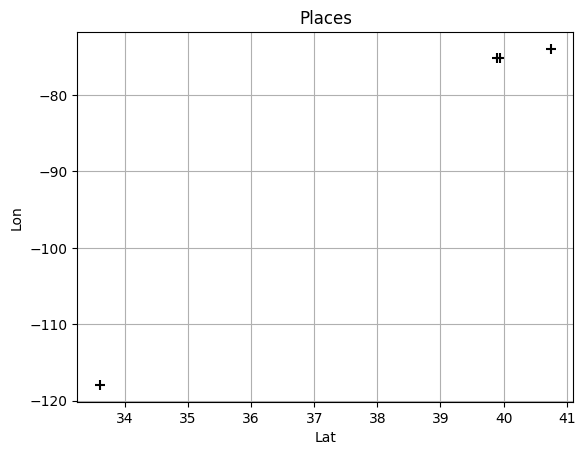

In [7]:
import matplotlib.pyplot as plt

place_strings = [
    "Rutgers Camden",
    "Empire State Building",
    "Lincoln Financial Field",
    "Newport Pier",
]

places_df = pd.DataFrame({"place": place_strings})


def lookup_place(place_string):
    location = geolocator.geocode(place_string)
    return location.address, location.latitude, location.longitude


places_df["address"], places_df["latitude"], places_df["longitude"] = zip(
    *places_df["place"].apply(lookup_place)
)

ax = places_df.plot.scatter(
    x="latitude", y="longitude", color="k", s=50, marker="+"
)
ax.set_title("Places")
ax.set_xlabel("Lat")
ax.set_ylabel("Lon")
ax.grid(True)

plt.show()

### Getting Data Directly From Sensors

In addition to looking up data, we also may be provided data directly from sensors. Here we will simulate our sensors.

We create a basic model of a drone. 

## GeoPandas